### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 2
### Due: Saturday, Jan 27th at 11.59pm CST
---

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

1) Write down the usual form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

2) Manipulate the above equation such that you can write the left hand side in terms of a normalized half-Gaussian distribution. 

3) Draw $N=10^5$ samples from a $\sigma=3$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your equation in (2). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

4) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

5) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

### Solution

### Solution 1.1

<span style="color:darkblue">



##### a. The usual form of a gaussian is 
 $$ f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2} \left(\frac{x - \mu}{\sigma}\right)^2} $$


##### b. If I plug in $\mu=0$ and $\sigma=\sigma$ then it becomes 
 $$ f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2} \left(\frac{x}{\sigma}\right)^2} $$


##### c. For a half gaussian where our bounds are from 0 to $+\infty$, we get a result of 1/2 
$$ \int_{0}^{\infty} \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x}{\sigma}\right)^2} \, dx = \frac{1}{2} $$

##### d. Since we need it to be equal to one, we can just multiply the function by 2. So the corresponding form for the half gaussian is 


<span style="color:blue">

$$ f_{half}(x) =  \frac{2}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2} \left(\frac{x}{\sigma}\right)^2} $$


</span>

### Solution 1.2

<span style="color:darkblue">

##### a. The goal here is to rewrite the left side of the x^3 equation such that the half gaussian equation appears on that left side. I notice that both the x^3 equation and the half gaussian equation already have 
$$ e^{-\frac{1}{2} \left(\frac{x}{\sigma}\right)^2} $$

##### b. So I need to figure out how to add in the term
$$ \frac{2}{\sigma\sqrt{2\pi}} $$ 

##### c. I can plug in the remaining half gaussian term by both multiplying and dividing by that term (like multiplying by 1) which looks like this 

$$ \int_0^\infty x^3 \left( \frac{2}{\sigma\sqrt{2\pi}} \right) \left( \frac{\sigma\sqrt{2\pi}}{2} \right) \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx
 $$

##### d. Now I can now rewrite f_half into my integral

<span style="color:blue">

$$ \frac{\sigma\sqrt{2\pi}}{2} \int_0^\infty x^3 f(x) \, dx
 $$

</span>

### Solution 1.3

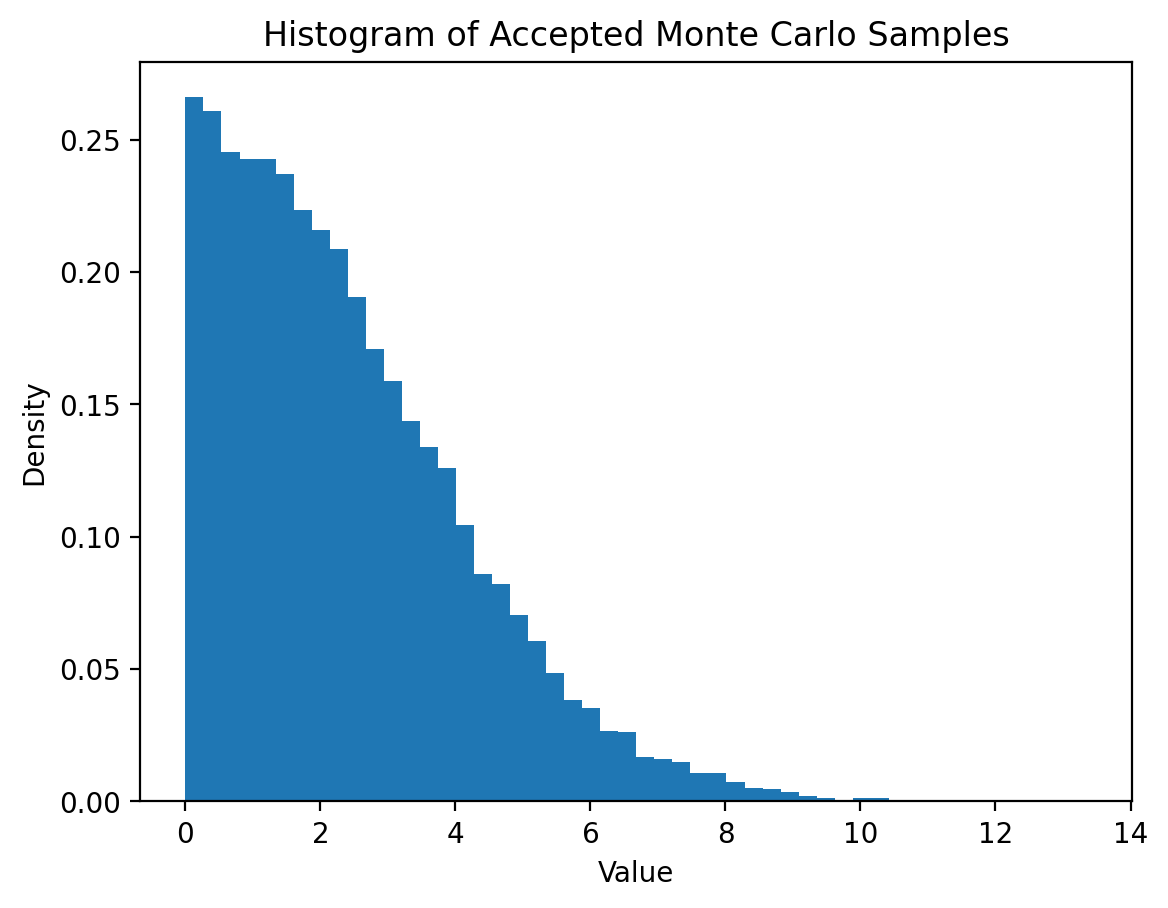

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'


#Generate data
sigma = 3
N = 100000  # 10^5 samples
sample_data = np.random.normal(0, sigma, N)

# Mask the samples to accept only positive values
positive_samples = sample_data[sample_data > 0]

# Create a histogram of the positive samples
counts, bins = np.histogram(positive_samples, bins=50, density=True)
maxh = counts.max()  # find the maximum count for the acceptance criterion

# Make a scipy.stats random variable object from the histogram of positive samples
disth = scipy.stats.rv_histogram((counts, bins))

# Generate new random points for rejection sampling
q = np.random.uniform(0.0, bins[-1], N)  # proposed points, up to the max bin (y axis)
u = np.random.uniform(0, maxh, N)  # uniform draws (x axis)

# Apply acceptance criteria
mask = u <= disth.pdf(q)  # mask values about u
monte_carlo = q[mask]  # apply mask leaving wanted values

# Plotting the histogram of accepted Monte Carlo samples
plt.hist(monte_carlo, bins=50, density=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Accepted Monte Carlo Samples')
plt.show()


In [2]:
positive_samples = monte_carlo

# Define the normalized half-Gaussian function f(x)
def f_half(x, sigma=3):
    return (2 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (x / sigma)**2)

# Evaluate x^3 * f_half(x) at the positive sample points
f_samples = positive_samples**3 * f_half(positive_samples)

# Compute the Monte Carlo estimate of integral
integral_estimate = np.mean(f_samples)

# Include the constant 
integral_constant = (sigma * np.sqrt(2 * np.pi) / 2) * integral_estimate

print(f"Estimated integral with constant: {integral_constant}")

Estimated integral with constant: 10.888846555271613


### Solution 1.4

In [3]:
import numpy as np
import scipy.stats

# Define parameters
sigma = 3
N_values = [10**2, 10**3, 10**4, 10**5]  # Different values of N
batches = 100  # Number of batches for each N
Results = []

for N in N_values:
    for i in range(batches):
        # Generate random samples from a normal distribution
        sample_data = np.random.normal(0, sigma, N)

        # Mask the samples to accept only positive values
        positive_samples = sample_data[sample_data > 0]

        # Calculate the integral estimate with constant
        f_samples = positive_samples**3 * f_half(positive_samples)
        integral_estimate = np.mean(f_samples)
        integral_constant = (sigma * np.sqrt(2 * np.pi) / 2) * integral_estimate

        # Append the result to the list
        Results.append(integral_constant)
Results=np.array(Results)
Results = np.reshape(Results, (4,100))

### Solution 1.5

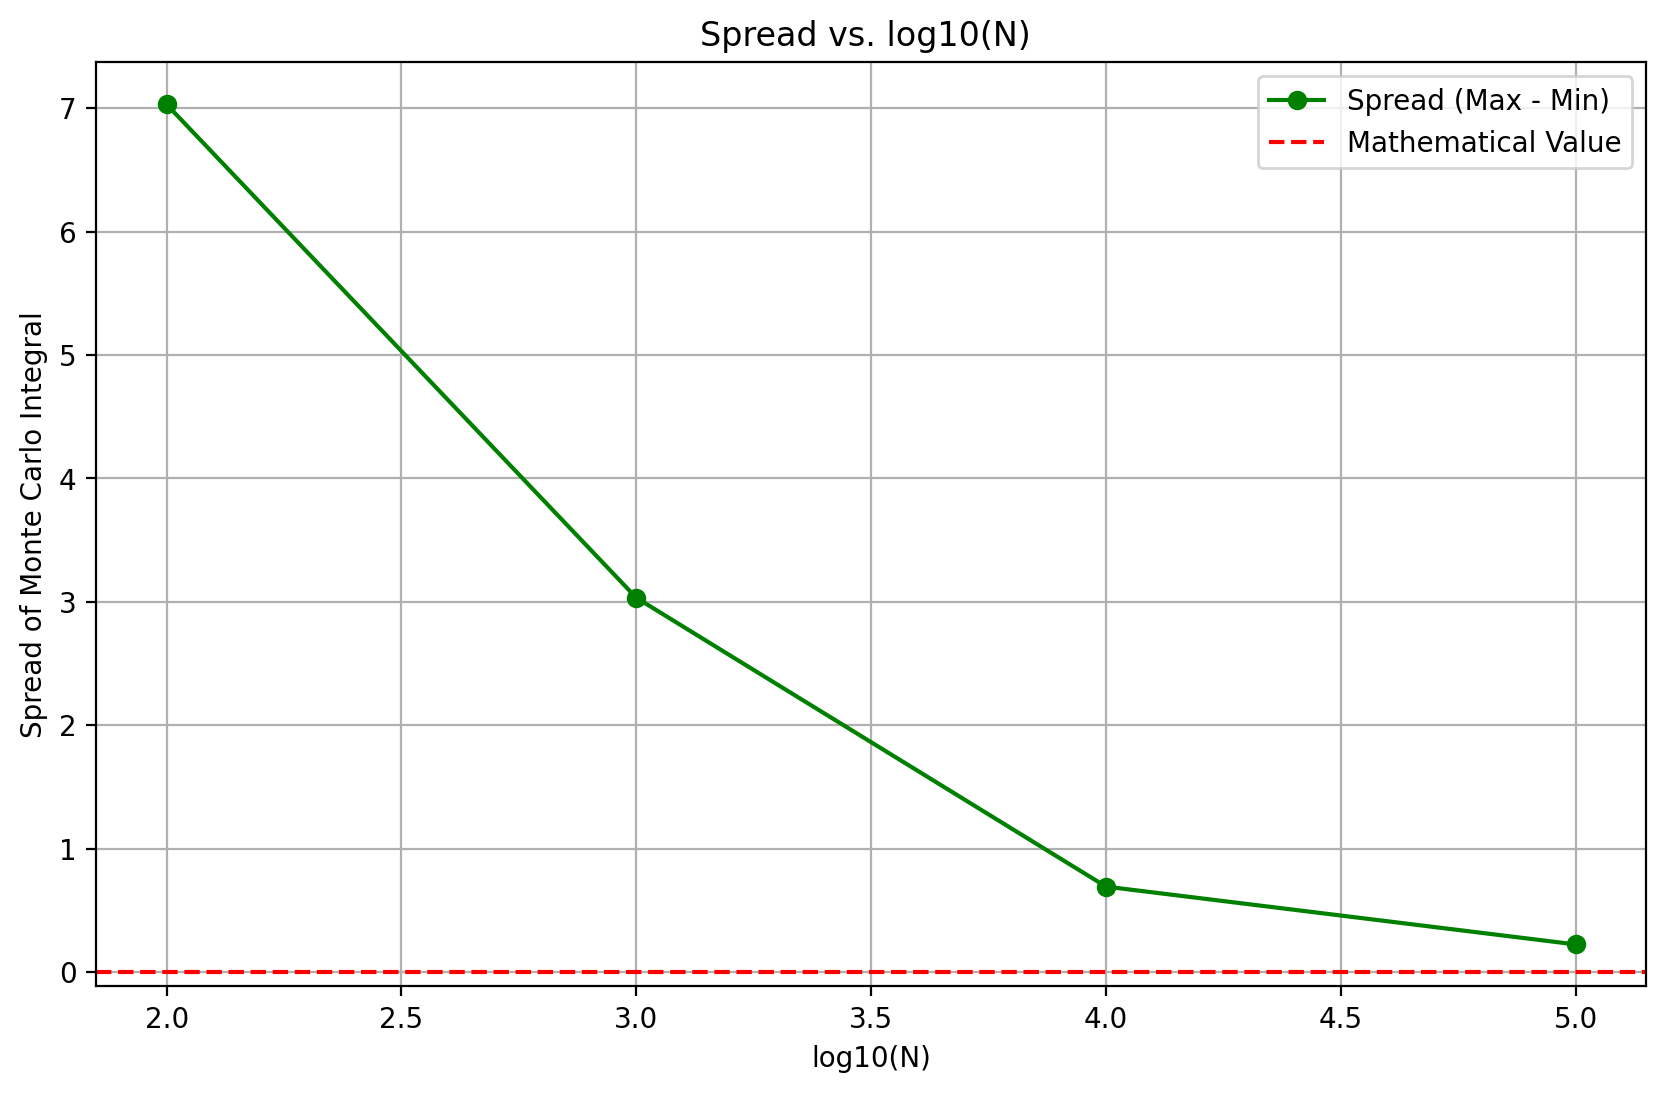

In [4]:
# Calculate the spread 
spread_values = np.max(Results, axis=1) - np.min(Results, axis=1)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(np.log10(N_values), spread_values, marker='o', linestyle='-', label='Spread (Max - Min)', color='g')
plt.axhline(y=0, color='r', linestyle='--', label='Mathematical Value')
plt.xlabel('log10(N)')
plt.ylabel('Spread of Monte Carlo Integral')
plt.title('Spread vs. log10(N) ')
plt.legend()
plt.grid(True)
plt.show()


## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=145$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 145? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

### Solution 2.1

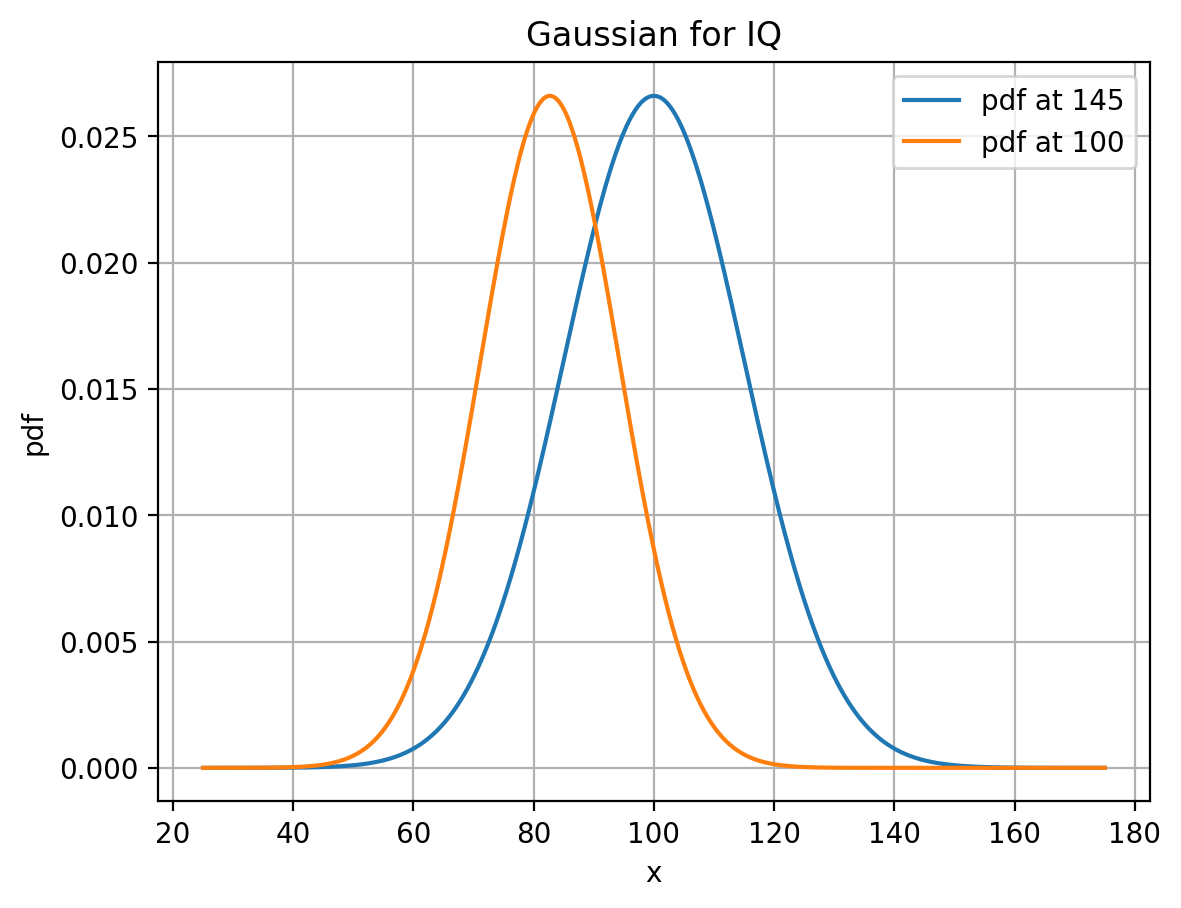

(<function print>,
 array([ 75.53272538, 101.40682788,  96.40436079,  84.55523214,
         94.74490112, 103.02037217,  91.68607266,  92.48992593,
         87.35007256, 102.11576393]))

In [5]:


N = 10 # Number of draws
mu = 100 # Location
mu2 = 145
sigma = 15

xgrid2 = np.linspace(mu2 - 8*sigma,mu2 + 5* sigma,1000)
xgrid = np.linspace(mu - 5*sigma,mu + 5* sigma,1000, ) # Array to sample the space 
xgrid2 = np.linspace(mu2 - 8*sigma,mu2 + 5* sigma,1000)
distG = scipy.stats.norm(mu, sigma) # Complete
plt.plot(xgrid, distG.pdf(xgrid), label='pdf at 145') # Complete
plt.plot(xgrid, distG.pdf(xgrid2),  label='pdf at 100') # Complete

plt.xlabel('x')
plt.ylabel('pdf')
plt.title('Gaussian for IQ')
plt.legend()
plt.grid(True)
plt.show()

# Generate random draws
random_draws = distG.rvs(size=N)
print, random_draws

### Solution 2.2

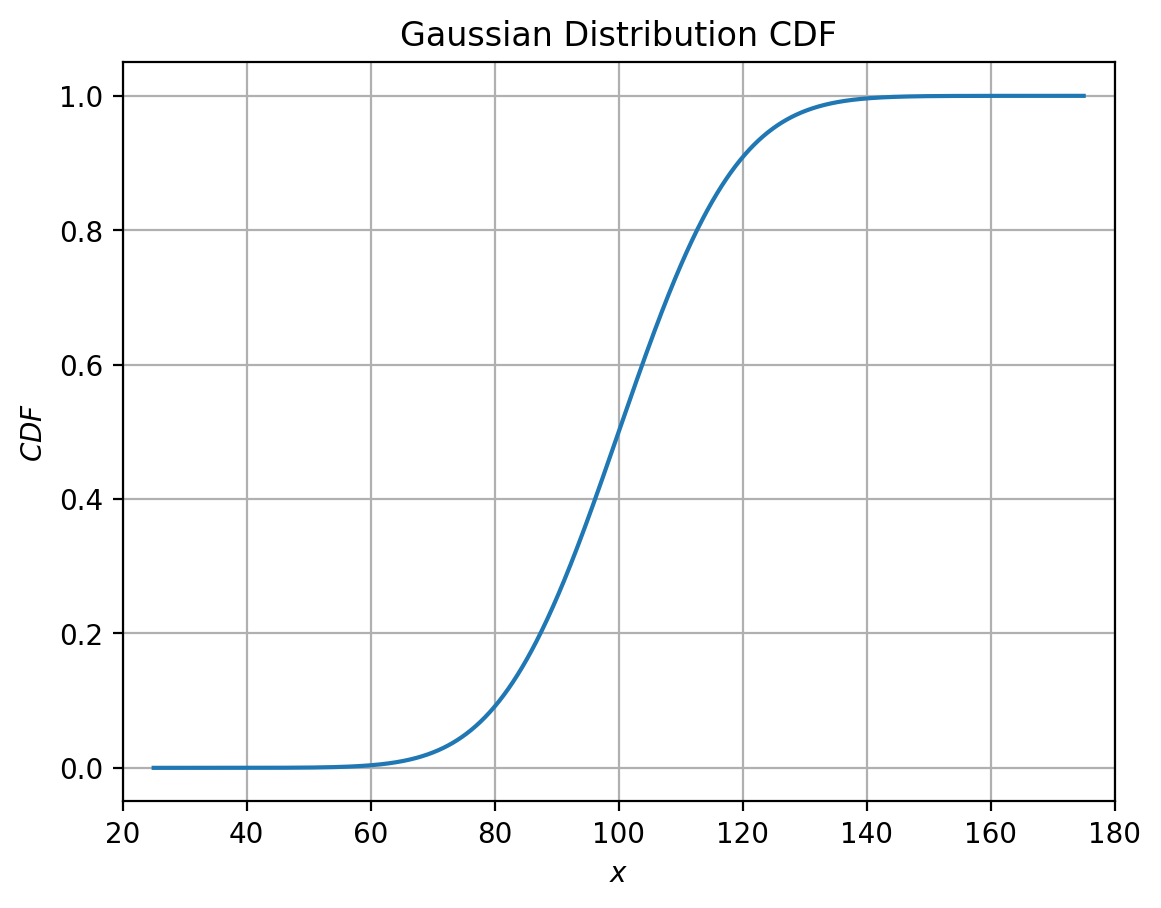

In [6]:
gaussCDF = distG.cdf(xgrid)
plt.plot(xgrid, gaussCDF, ls='-')
plt.xlim(20, 180)
#plt.ylim(-0.01, 1.01)
plt.xlabel('$x$')
plt.ylabel('$CDF$')
plt.title('Gaussian Distribution CDF')
#plt.legend(loc=4)
plt.grid(True)



/var/folders/5c/kkcpl36x6c78d36n8pktxwjm0000gr/T/ipykernel_35826/2675201452.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(xgrid, distG.pdf(xgrid), 'r', label='PDF', color='orange')


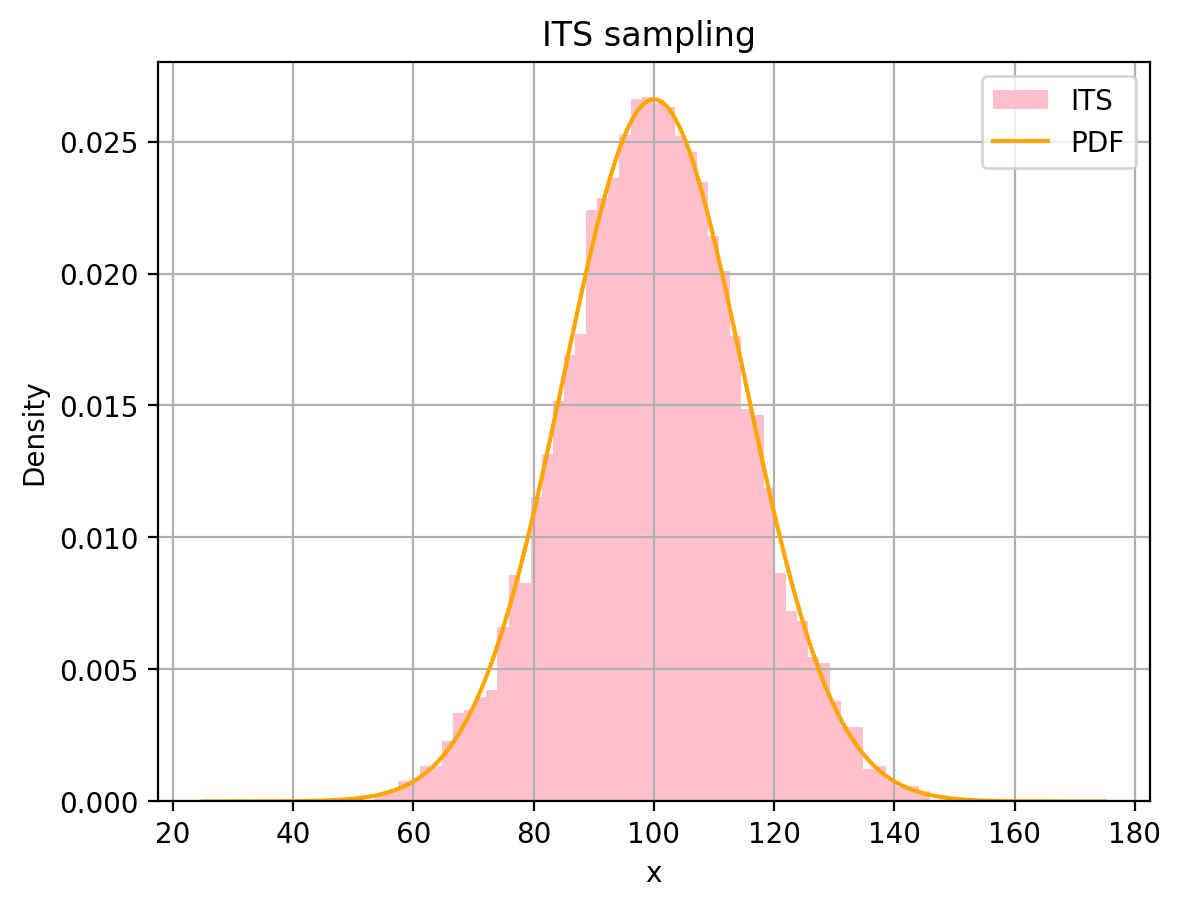

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy.interpolate

# Parameters of the Gaussian distribution
mu = 100
sigma = 15
N = 10**4

# Inverse Transform Sampling
# Sample evenly along the cumulative distribution, and interpolate
data = np.random.uniform(0.001, 0.999, N)
PPFsample = distG.ppf(data) #this is the inverse of the CDF so I dont need to add back in gaussCDF

# Plot a histogram of the generated samples
plt.figure()
plt.hist(PPFsample, bins=50, density=True, color='pink', label='ITS')
plt.plot(xgrid, distG.pdf(xgrid), 'r', label='PDF', color='orange')
plt.title('ITS sampling ')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

plt.show()


### Solution 2.3

In [8]:
# Calculate the fraction of people with IQ > 145
fraction_above_145 = 1 - distG.cdf(145)

print(f"Fraction of people with IQ > 145: {fraction_above_145:.4f} which is about .1%")

Fraction of people with IQ > 145: 0.0013 which is about .1%


### Solution 2.4

In [9]:
# Calculate the IQ score of 1 in a million

percentile = 1- ( 1/(10**6))
iq_one_in_a_million = distG.ppf(percentile)

print(f"IQ score for one in a million is {iq_one_in_a_million:.2f}")

IQ score for one in a million is 171.30


## Problem 3

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

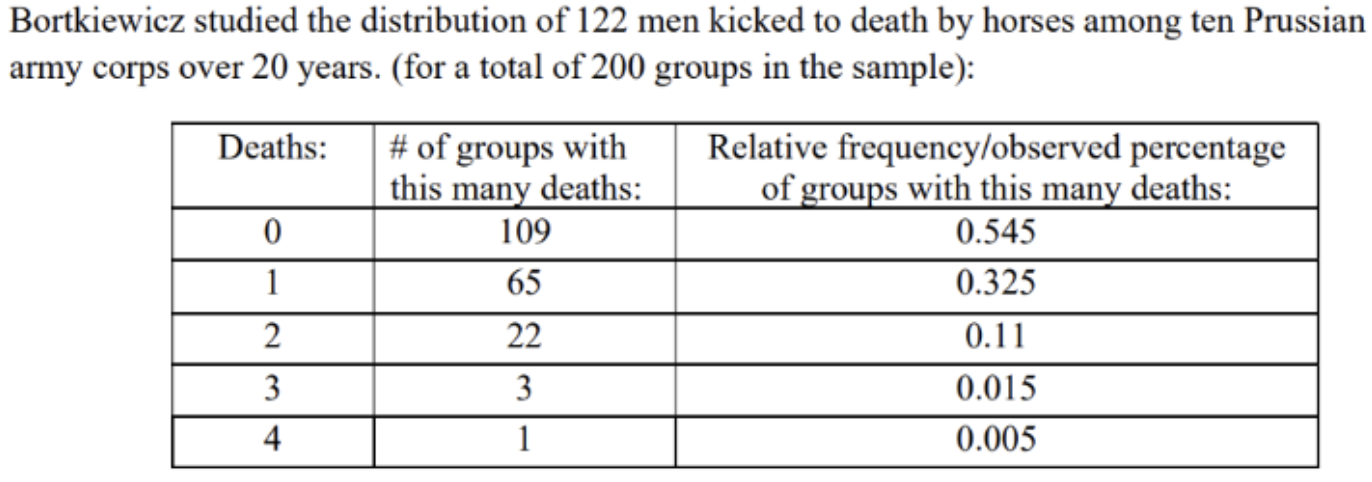

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting next week, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution

### Solution 3.1

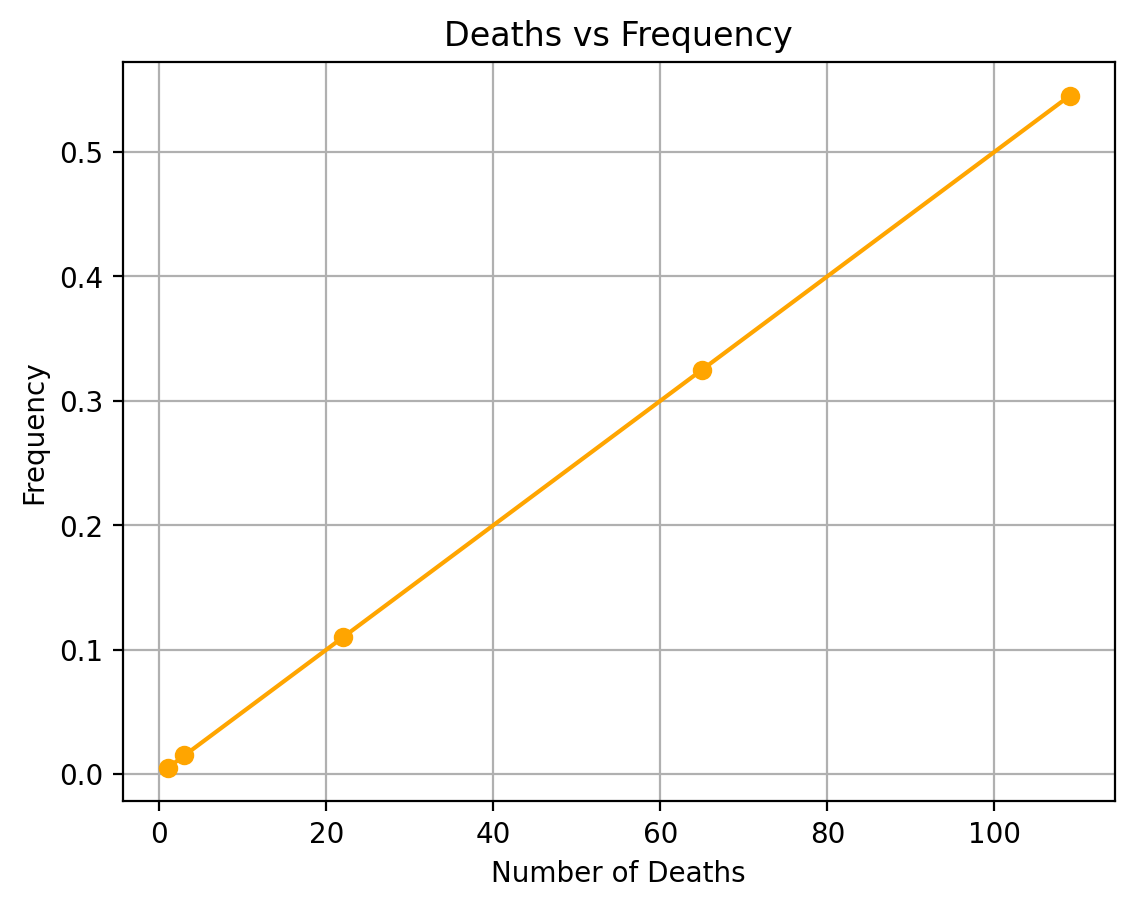

In [38]:
#Plot the first and third column 

Num_Death = np.array([109,65,22,3,1])
Freq = np.array([.545, .325, .11, .015, .005])
plt.plot(Num_Death, Freq, color='orange', marker='o')
plt.title('Deaths vs Frequency')
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency')
#plt.legend()
plt.grid(True)

#plt.show()

### Solution 3.2

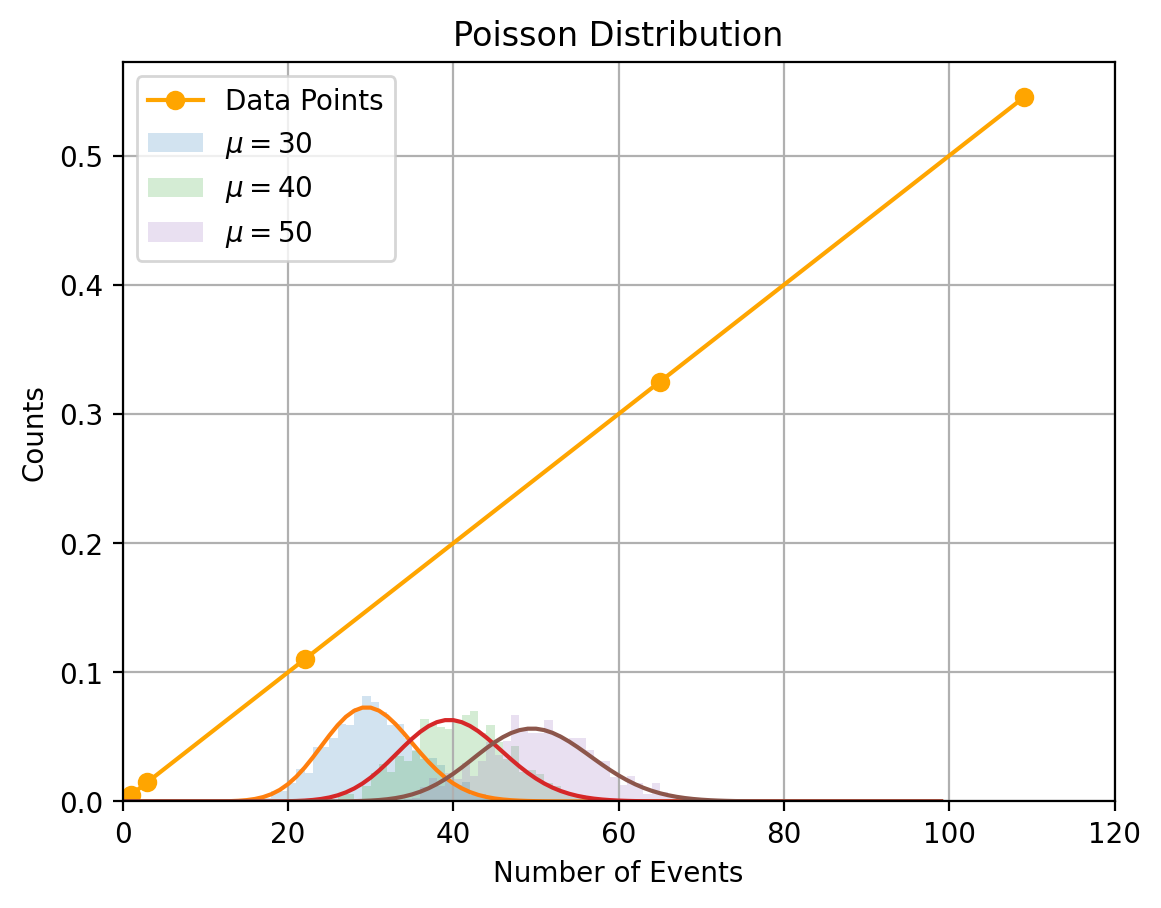

In [39]:
# Plot the first and third columns
from scipy.stats import poisson
plt.plot(Num_Death, Freq, marker='o', linestyle='-', color='orange', label='Data Points')

# Generate Poisson distributions 
mu_values = [30, 40, 50]
kpts = np.arange(0, 100)

for mu in mu_values:
    # Random draws
    random_data = poisson.rvs(mu, size=1000)
    # Histogram of random draws
    plt.hist(random_data, density=True, alpha=0.2, bins=range(0, 100), label=f'$\mu={mu}$')
    # Probability density at bin locations
    plt.plot(kpts, poisson.pmf(kpts, mu), '-')
  

plt.legend()
plt.title("Poisson Distribution")
plt.xlabel("Number of Events")
plt.ylabel("Counts")
plt.grid(True)
plt.xlim(0, 120)

plt.show()

### Solutions 3.3

In [46]:

# Create a dataset 
NFreq=Freq*100
NewData = np.repeat(Num_Death, np.round(NFreq * len(Num_Death)).astype(int))


#Find the weighted mean 
Wmean = np.sum(Num_Death * Freq)


In [44]:
# Weighted Standard Deviation
STD = np.std(NewData)

# Median
median = np.median(NewData)

# Mode (approximately, since we have discrete data)
from scipy.stats import mode
mode = mode(NewData)


# Skewness
from scipy.stats import skew
skew = skew(NewData)

# Kurtosis
from scipy.stats import kurtosis
kurt = kurtosis(NewData)


print (f"Weighted Mean: {Wmean}")
print(f"Standard Deviation: {STD}")
print (f"Median: {median}")
print(f"Mode: {mode}")
print (f"Skewness: {skew}")
print(f"Kurtosis: {kurt}")

Weighted Mean: 83.0
Standard Deviation: 31.822568783804993
Median: 109.0
Mode: ModeResult(mode=109, count=273)
Skewness: -0.8626031231573105
Kurtosis: -0.4179988193028543


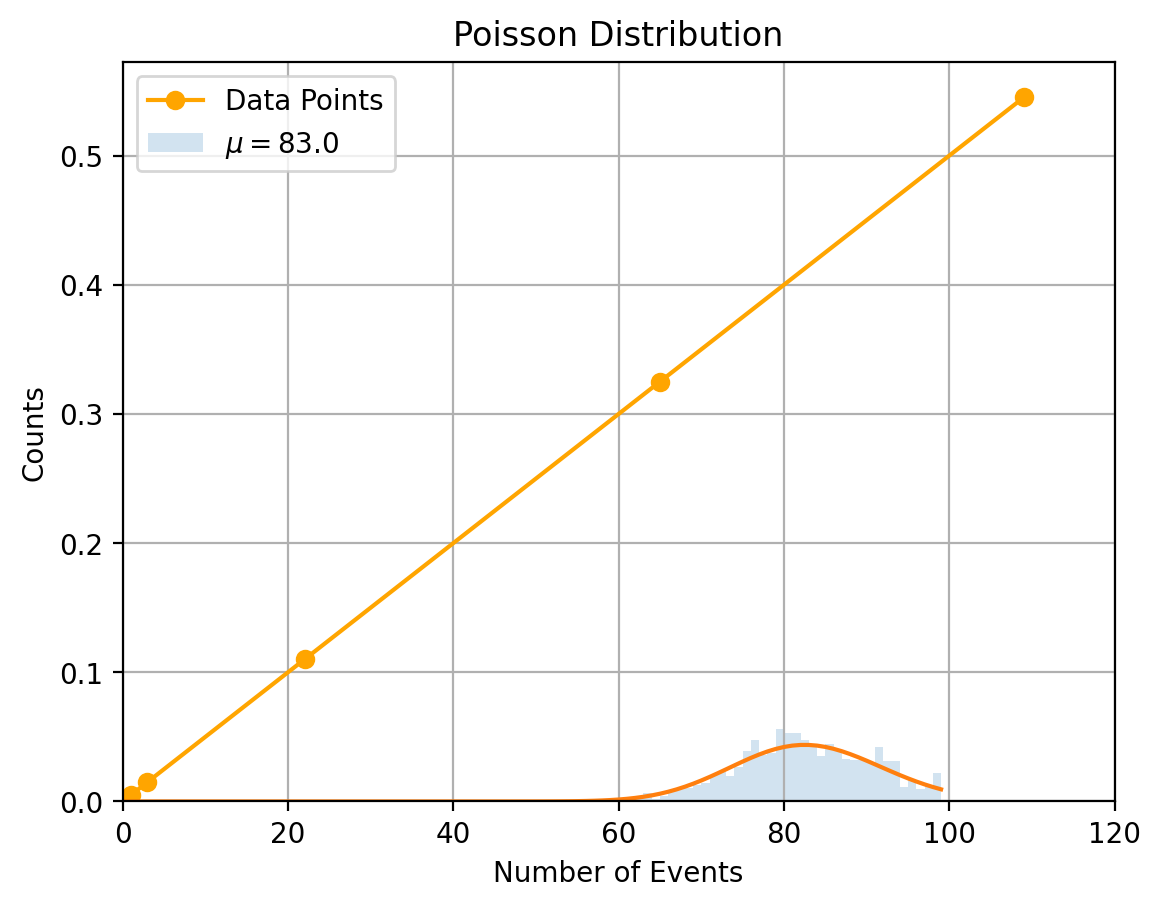

In [45]:
# Plot the first and third columns
plt.plot(Num_Death, Freq, marker='o', linestyle='-', color='orange', label='Data Points')

# Generate Poisson distributions 
mu = Wmean
kpts = np.arange(0, 100)


random_data = poisson.rvs(mu, size=1000)
plt.hist(random_data, density=True, alpha=0.2, bins=range(0, 100), label=f'$\mu={mu}$')
plt.plot(kpts, poisson.pmf(kpts, mu), '-')

plt.legend()
plt.title("Poisson Distribution")
plt.xlabel("Number of Events")
plt.ylabel("Counts")
plt.grid(True)
plt.xlim(0, 120)

plt.show()